<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/TFM__TABULAR_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

In [ ]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Dense, Flatten, Activation, Dropout, Reshape, Conv1D, Masking, LSTM, Conv2D, Input,Multiply, Lambda
from keras.optimizers import Adam
from keras.regularizers import L2, L1L2, L1
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, concatenate, Conv1D, Flatten
from keras.models import Model
import numpy as np
import networkx as nx
from keras.utils import plot_model
from keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
import random
import numpy as np
import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, SpatialDropout1D, BatchNormalization, Concatenate
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping
import time
from keras import backend as K
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
import tensorflow as tf
from datetime import date, timedelta
from sklearn.model_selection import train_test_split

# DATOS

La etiqueta label es 1 si el activo tubo su alpha "A" dias por encima del valor cero o "B"

In [ ]:
csv = pd.read_csv("categorical_dataset_1.csv")

In [ ]:
csv

ticker        date  days_in_index  period_total_return  calmar_ratio  \
0         BKT  1993-09-27             30             0.000656      0.919980   
1         MAP  1993-09-27             30             0.033615      0.635095   
2         FCC  1993-09-27             30            -0.115541      0.583587   
3         VIS  1993-09-27             30            -0.025183      1.079786   
4       ACX_1  1993-09-27             30            -0.044690      1.606968   
...       ...         ...            ...                  ...           ...   
207277    LOG  2023-07-12            143            -0.022579      0.260770   
207278   BBVA  2023-07-12           7578            -0.023951      0.033810   
207279  UNI_1  2023-07-12            138            -0.013648      0.113572   
207280    GRF  2023-07-12           3969             0.001199      0.035407   
207281  ACX_2  2023-07-12           2064             0.004510      0.063292   

        max_drawdown  period_cumulative_return  total_cumulative_return  \
0          -0.107831                  0.023921                 0.023921   
1          -0.154205                  0.061964                 0.061964   
2          -0.170993                  0.006315                 0.006315   
3          -0.093674                 -0.034444                -0.034444   
4          -0.063302                 -0.051709                -0.051709   
...              ...                       ...                      ...   
207277     -0.130915                  0.072940                 0.064379   
207278     -0.934365                  0.149377                 2.234719   
207279     -0.293158                  0.098265                -0.059247   
207280     -0.899149                  0.142025                 0.727507   
207281     -0.545156                  0.061980                -0.113663   

        days_since_last_max  days_since_last_min  ...  treynor_ratio  \
0                        28                   13  ...       0.000711   
1                        26                   33  ...       0.004151   
2                        29                   13  ...       0.000125   
3                        35                    6  ...      -0.001823   
4                        29                   13  ...      -0.003281   
...                     ...                  ...  ...            ...   
207277                  160                  119  ...       0.004429   
207278                 6000                10604  ...       0.003989   
207279                  166                   69  ...       0.002935   
207280                 1237                 4738  ...       0.004954   
207281                  545                 1199  ...       0.002453   

        benchmark_distance  information_ratio  modigliani_measure  \
0                 0.012964           0.033442            0.037714   
1                 0.022462           0.075011            0.050168   
2                 0.024325          -0.005909            0.062068   
3                 0.015026          -0.098966            0.028161   
4                 0.011648          -0.178471            0.001339   
...                    ...                ...                 ...   
207277            0.007531           0.128686            0.000933   
207278            0.009094           0.413483            0.016706   
207279            0.010254           0.177485            0.016415   
207280            0.022314           0.146119            0.025366   
207281            0.010701           0.056325            0.014121   

        alfa_jensen  sharpe_ratio_next_period  \
0         -0.221740                 -8.084254   
1         -0.120701                 -5.937999   
2         -0.398903                 -6.236928   
3         -0.193920                 -4.852140   
4         -0.202025                 -7.100147   
...             ...                       ...   
207277    -0.084842                 -4.769329   
207278    -0.118941                 -2.798884   
207279    -0.102451   

In [ ]:
csv.columns

Index(['ticker', 'date', 'days_in_index', 'period_total_return',
       'calmar_ratio', 'max_drawdown', 'period_cumulative_return',
       'total_cumulative_return', 'days_since_last_max', 'days_since_last_min',
       'value_at_risk', 'expected_shortfall', 'period_mean_return',
       'period_std_return', 'period_min_return', 'period_max_return',
       'sharpe_ratio', 'sortino_ratio', 'beta', 'treynor_ratio',
       'benchmark_distance', 'information_ratio', 'modigliani_measure',
       'alfa_jensen', 'sharpe_ratio_next_period',
       'period_total_return_next_period', 'alfa_jensen_next_period',
       'alfa_signal', 'label'],
      dtype='object')

In [ ]:
csv.head().iloc[:,-1]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

In [ ]:
csv.head().iloc[:,2:-5]

days_in_index  period_total_return  calmar_ratio  max_drawdown  \
0             30             0.000656      0.919980     -0.107831   
1             30             0.033615      0.635095     -0.154205   
2             30            -0.115541      0.583587     -0.170993   
3             30            -0.025183      1.079786     -0.093674   
4             30            -0.044690      1.606968     -0.063302   

   period_cumulative_return  total_cumulative_return  days_since_last_max  \
0                  0.023921                 0.023921                   28   
1                  0.061964                 0.061964                   26   
2                  0.006315                 0.006315                   29   
3                 -0.034444                -0.034444                   35   
4                 -0.051709                -0.051709                   29   

   days_since_last_min  value_at_risk  expected_shortfall  ...  \
0                   13      -0.022021           -0.043725  ...   
1                   33      -0.028822           -0.034537  ...   
2                   13      -0.025899           -0.037168  ...   
3                    6      -0.025901           -0.026140  ...   
4                   13      -0.020764           -0.027540  ...   

   period_min_return  period_max_return  sharpe_ratio  sortino_ratio  \
0          -0.058932           0.042506     -5.376822      -0.983689   
1          -0.039382           0.067535     -4.301783      -0.974862   
2          -0.044850           0.131131     -3.274449      -0.959185   
3          -0.026179           0.029903     -6.201492      -0.987664   
4          -0.029422           0.025102     -8.516894      -0.993403   

       beta  treynor_ratio  benchmark_distance  information_ratio  \
0  1.121307       0.000711            0.012964           0.033442   
1  0.497607       0.004151            0.022462           0.075011   
2  1.679837       0.000125            0.024325          -0.005909   
3  0.629720      -0.001823            0.015026          -0.098966   
4  0.525264      -0.003281            0.011648          -0.178471   

   modigliani_measure  alfa_jensen  
0            0.037714    -0.221740  
1            0.050168    -0.120701  
2            0.062068    -0.398903  
3            0.028161    -0.193920  
4            0.001339    -0.202025  

[5 rows x 22 columns]

In [ ]:
csv.shape

(207282, 29)

In [ ]:
sorted(set(csv.date))[0], sorted(set(csv.date))[-1]

('1993-09-27', '2023-07-12')

In [ ]:
fecha_corte = '2021-01-01'
df = pd.read_csv("categorical_dataset_1.csv")

#self.df_ordenado = df.sort_values(by='date')
df_train = df[df['date'] <= fecha_corte]
df_test = df[df['date'] > fecha_corte]

In [ ]:
(df[df['date'] <= fecha_corte]).head()

ticker        date  days_in_index  period_total_return  calmar_ratio  \
0    BKT  1993-09-27             30             0.000656      0.919980   
1    MAP  1993-09-27             30             0.033615      0.635095   
2    FCC  1993-09-27             30            -0.115541      0.583587   
3    VIS  1993-09-27             30            -0.025183      1.079786   
4  ACX_1  1993-09-27             30            -0.044690      1.606968   

   max_drawdown  period_cumulative_return  total_cumulative_return  \
0     -0.107831                  0.023921                 0.023921   
1     -0.154205                  0.061964                 0.061964   
2     -0.170993                  0.006315                 0.006315   
3     -0.093674                 -0.034444                -0.034444   
4     -0.063302                 -0.051709                -0.051709   

   days_since_last_max  days_since_last_min  ...  treynor_ratio  \
0                   28                   13  ...       0.000711   
1                   26                   33  ...       0.004151   
2                   29                   13  ...       0.000125   
3                   35                    6  ...      -0.001823   
4                   29                   13  ...      -0.003281   

   benchmark_distance  information_ratio  modigliani_measure  alfa_jensen  \
0            0.012964           0.033442            0.037714    -0.221740   
1            0.022462           0.075011            0.050168    -0.120701   
2            0.024325          -0.005909            0.062068    -0.398903   
3            0.015026          -0.098966            0.028161    -0.193920   
4            0.011648          -0.178471            0.001339    -0.202025   

   sharpe_ratio_next_period  period_total_return_next_period  \
0                 -8.084254                        -0.007821   
1                 -5.937999                        -0.012591   
2                 -6.236928                        -0.029329   
3                 -4.852140                        -0.014097   
4                 -7.100147                         0.050970   

   alfa_jensen_next_period  alfa_signal  label  
0                -0.204024          0.0    0.0  
1                -0.198696          0.0    0.0  
2                -0.246464          0.0    0.0  
3                -0.231830          0.0    0.0  
4                -0.067502          0.0    0.0  

[5 rows x 29 columns]

In [ ]:
(df[df['date'] > fecha_corte]).head()

ticker        date  days_in_index  period_total_return  calmar_ratio  \
184964   AENA  2021-01-04           1417            -0.018777     -0.008484   
184965    SLR  2021-01-04             53             0.040986     -0.045590   
184966    MRL  2021-01-04           1287             0.029890     -0.007294   
184967    FER  2021-01-04           4128            -0.029990     -0.004670   
184968    ACS  2021-01-04           5772             0.018905     -0.008138   

        max_drawdown  period_cumulative_return  total_cumulative_return  \
184964     -0.540323                 -0.031974                 0.526135   
184965     -0.338655                  0.293682                 0.347050   
184966     -0.602586                 -0.037642                -0.314811   
184967     -0.935518                 -0.038424                 1.682968   
184968     -0.925131                  0.056353                 1.596892   

        days_since_last_max  days_since_last_min  ...  treynor_ratio  \
184964                  565                 2013  ...      -0.001301   
184965                    5                   68  ...      -0.184788   
184966                  412                  161  ...      -0.001079   
184967                  320                 4319  ...      -0.001535   
184968                  615                 7630  ...       0.001997   

        benchmark_distance  information_ratio  modigliani_measure  \
184964            0.014534          -0.120546           -0.002675   
184965            0.028319           0.333083            0.001330   
184966            0.014448          -0.134458           -0.003127   
184967            0.008580          -0.233640           -0.001741   
184968            0.015735           0.073656           -0.001255   

        alfa_jensen  sharpe_ratio_next_period  \
184964    -0.014190                  0.225893   
184965     0.046705                  0.033991   
184966     0.034031                  0.334027   
184967    -0.025423                  0.140256   
184968     0.023334                  0.206067   

        period_total_return_next_period  alfa_jensen_next_period  alfa_signal  \
184964                         0.001445                 0.007098          0.0   
184965                        -0.085201                -0.079294          1.0   
184966                        -0.023418                -0.017876          1.0   
184967                         0.001306                 0.006960          0.0   
184968                        -0.035855                -0.030215          0.0   

        label  
184964    1.0  
184965    0.0  
184966    1.0  
184967    0.0  
184968    1.0  

[5 rows x 29 columns]

In [ ]:
df_train.shape, df_test.shape

((184964, 29), (22318, 29))

## misDatos (class)

In [ ]:
class misDatos():
  def __init__(self, dataset = "categorical_dataset_1.csv", fecha_corte = '2021-01-01'):

    # Leer el archivo Parquet en un dataframe de pandas
    #table = pq.read_table(dataset)
    #df = table.to_pandas()
    df = pd.read_csv(dataset)

    #self.df_ordenado = df.sort_values(by='date')

    self.df_train = df[df['date'] <= fecha_corte]
    self.df_test = df[df['date'] > fecha_corte]

    self.df_y_train = self.df_train.iloc[:,-1]
    self.df_x_train = self.df_train.iloc[:,2:-5]

    self.df_y_test = self.df_test.iloc[:,-1]
    self.df_x_test = self.df_test.iloc[:,2:-5]

    self.scaler = StandardScaler()

    self.X_train= self.scaler.fit_transform(self.df_x_train)
    self.X_test = self.scaler.transform(self.df_x_test)

    self.Y_train = np.array(self.df_y_train)
    self.Y_test = np.array(self.df_y_test)


# REGLAS EVOLUTIVO

##  create_model (class)

Por temas de coste computacional se reduce el numero de neuronas posibles, los resultados aumentandolas son similares, y ademas los modelos tienden a sobre aprender

In [ ]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
class create_model():

  def __init__(self,
               neurones_range = [1,2,3,4,5],
               l2_range = [0,0.3,0.6,0.9],
               dropout_range = [0,0.3,0.6,0.9],
               model_location = [0,1,2,3,4,5],
               model_file_name = 'best_model_1.h5'
               ):

    self.neurones_range = neurones_range
    self.l2_range = l2_range
    self.dropout_range = dropout_range
    self.model_location = model_location# si no hay modelo a introducir dejar el array asi : [-1]

    self.model_file_name = model_file_name


    self.gen_dic = {
          "neurones_range_0":self.neurones_range,
          "neurones_range_1":self.neurones_range,
          "neurones_range_2":self.neurones_range,
          "neurones_range_3":self.neurones_range,
          "neurones_range_4":self.neurones_range,
          "neurones_range_5":self.neurones_range,

          "l2_range_0":self.l2_range,
          "l2_range_1":self.l2_range,
          "l2_range_2":self.l2_range,
          "l2_range_3":self.l2_range,
          "l2_range_4":self.l2_range,
          "l2_range_5":self.l2_range,

          "dropout_range_0":self.dropout_range,
          "dropout_range_1":self.dropout_range,
          "dropout_range_2":self.dropout_range,
          "dropout_range_3":self.dropout_range,
          "dropout_range_4":self.dropout_range,
          "dropout_range_5":self.dropout_range,

          "model_location": self.model_location

    }
  # METODOS PARA CREAR LOS INDIVIDUOS
  def crear_fila_conexiones(self, n):
    num_ones = np.random.randint(1, n + 1)
    array = np.array([1]*num_ones + [0]*(n-num_ones))
    np.random.shuffle(array)
    return array


  def crear_fila_conexiones_0(self, n):
    num_ones = np.random.randint(0, n+1)
    array = np.array([1]*num_ones + [0]*(n-num_ones))
    np.random.shuffle(array)
    return array

  def crear_individuo(self):

    neurones_range = self.neurones_range
    l2_range = self.l2_range
    dropout_range = self.dropout_range
    model_location = self.model_location

    ind = np.concatenate((
      self.crear_fila_conexiones(5) ,
      self.crear_fila_conexiones_0(4),
      self.crear_fila_conexiones_0(3),
      self.crear_fila_conexiones_0(2),
      self.crear_fila_conexiones_0(1),

      np.random.choice(neurones_range, size=1),
      np.random.choice(neurones_range, size=1),
      np.random.choice(neurones_range, size=1),
      np.random.choice(neurones_range, size=1),
      np.random.choice(neurones_range, size=1),
      np.random.choice(neurones_range, size=1),

      np.random.choice(l2_range, size=1),
      np.random.choice(l2_range, size=1),
      np.random.choice(l2_range, size=1),
      np.random.choice(l2_range, size=1),
      np.random.choice(l2_range, size=1),
      np.random.choice(l2_range, size=1),

      np.random.choice(dropout_range, size=1),
      np.random.choice(dropout_range, size=1),
      np.random.choice(dropout_range, size=1),
      np.random.choice(dropout_range, size=1),
      np.random.choice(dropout_range, size=1),
      np.random.choice(dropout_range, size=1),

      np.random.choice(model_location, size=1)


    ))

    return ind

  def crear_population(self, n):
    return np.array([self.crear_individuo() for _ in range(n)])

  def crear_matrix(self, individuo_matrix_genes):
    matrix = [
        np.concatenate((  np.array([0]) ,         individuo_matrix_genes[0:5] )),
        np.concatenate((  np.array([0,0]) ,       individuo_matrix_genes[5:9]  )),
        np.concatenate((  np.array([0,0,0]) ,     individuo_matrix_genes[9:12] )),
        np.concatenate((  np.array([0,0,0,0]) ,   individuo_matrix_genes[12:14]  )),
        np.concatenate((  np.array([0,0,0,0,0]) , individuo_matrix_genes[14:15]  )),
        np.array([0,0,0,0,0,0]),
    ]
    return matrix


  # METODOS PARA CREAR MODELO


  def create_layer_model(self, node, new_input, trainable = False ):

    trained_model = load_model(self.model_file_name)

    for layer in trained_model.layers:
      layer.trainable = trainable

    m = Dense(12 , activation='relu' , kernel_initializer='he_normal', name = "EntradaModeloEntrenado_"+ str(node))(new_input)
    m = trained_model(m)

    return m



  def output_layer(self, node_outputs, output_shape, activation='sigmoid' ):

    m = Flatten()(list(node_outputs.values())[-1])
    # Crear ultima capa densa para el modelo
    node_output = Dense(1, activation=activation, kernel_initializer='he_normal', name="OUTPUT"  )(m)
    # Almacenar la salida


    return node_output

  def normal_layer(self, node, node_input, n_neurons, l2, do):
    if l2 == 0 :  m = Dense(n_neurons, activation='relu'                            , kernel_initializer='he_normal', name="Densa_" + str(node) )(node_input)
    if l2 > 0 :   m = Dense(n_neurons, activation='relu', kernel_regularizer=L2(l2) , kernel_initializer='he_normal', name="Densa_" + str(node) )(node_input)
    if do > 0 :   m = Dropout(do)(m)
    return m

  def create_model_from_graph(self, matrix, gen_neurons_array, gen_l2_array, gen_dropout_array ,gen_model_location ,input_shape, output_shape):

    graph = nx.from_numpy_array(np.array(matrix), create_using=nx.DiGraph)

    # Crear una capa de entrada para el modelo
    input_layer = Input(shape=input_shape, name="INPUT")

    # Crear un diccionario para almacenar las salidas de las capas para cada nodo
    node_outputs = {}
    disconnected_nodes = set()  # para almacenar nodos desconectados

    # CONFIGURACION RED INTERNA

    # Procesar los nodos en orden topológico
    for node in nx.topological_sort(graph):
        node_input = None

        if (graph.in_degree(node) == 0) and (len(node_outputs) == 0) :
            # El primer nodo tiene el input como entrada , OBLIGATORIO, es el priemro de todos y nunca tiene "padre"
            node_input = input_layer
        elif (graph.in_degree(node) == 0) and (node != 0 ):
            # Si el nodo no tiene predecesores, su entrada es la capa de entrada del modelo
            disconnected_nodes.add(node)
            #print("nodo desconectado")
            continue

        else:
            len_aux =  len([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes])
            # Todos sus predecesores estan desconectados
            if(len_aux == 0):
              disconnected_nodes.add(node)

              continue

            # Si el nodo tiene predecesores, su entrada es la concatenación de las salidas de sus predecesores

            if len([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes]) > 1:
              node_input = concatenate([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes])
            else:

              node_input = [node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes][0]

        #print("node",node)
        #print("gen_model_location",gen_model_location)
        if node == gen_model_location:
          # Añadir modelo como capa
          node_output = self.create_layer_model(node, node_input)
        else:
           # Crear una capa densa para el nodo
          node_output = self.normal_layer(node, node_input, gen_neurons_array[node], gen_l2_array[node], gen_dropout_array[node])

        # Almacenar la salida de la capa para este nodo
        node_outputs[node] = node_output


    # CONFIGURACION PARA SALIDA

    model_output = self.output_layer(node_outputs, output_shape, activation='sigmoid' )
    # Crear el modelo de Keras
    model = Model(inputs=input_layer, outputs=model_output)


    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    return model


  def create_model(self, indv, X_shape, Y_shape):

    indv_matrix = self.crear_matrix(indv)

    indv_model = self.create_model_from_graph(indv_matrix, indv[15:21], indv[21:27], indv[27:33], indv[-1]  , X_shape, Y_shape)

    return indv_model

##  evo_rules (class)

In [ ]:
class evo_rules():
  def __init__(self, create_model):
    self.this_ = self
    self.create_model = create_model

  def crear_conjuntos(self, x, y):
    x = x
    y = y

    # Divide los datos en dos conjuntos: 66% y 34%
    x_temp, x_third, y_temp, y_third = train_test_split(x, y, test_size=0.34, random_state=42)

    # Divide el conjunto x_temp nuevamente para obtener dos conjuntos del 33% c/u.
    x_first, x_second, y_first, y_second = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

    return x_first, y_first, x_second, y_second, x_third, y_third


  def fitness_function_split(self,population, X_TRAIN,  Y_TRAIN, epochs, patience = 50,  verbose = 0 ):

    #x_first, y_first, x_second, y_second, x_third, y_third = self.crear_conjuntos(X_TRAIN, Y_TRAIN)

    h_fitness = np.empty(population.shape[0])
    h_layers = np.empty(population.shape[0])
    h_params = np.empty(population.shape[0])


    for i in range(population.shape[0]):

      fitness_1, h_layers_1, h_params_1 = self.fitness_function(np.array([population[i]]), X_TRAIN,  Y_TRAIN, epochs, patience ,  verbose  )
      fitness_2, h_layers_2, h_params_2 = self.fitness_function(np.array([population[i]]), X_TRAIN,  Y_TRAIN, epochs, patience ,  verbose  )
      fitness_3, h_layers_3, h_params_3 = self.fitness_function(np.array([population[i]]), X_TRAIN,  Y_TRAIN, epochs, patience ,  verbose  )
      fitness_4, h_layers_4, h_params_4 = self.fitness_function(np.array([population[i]]), X_TRAIN,  Y_TRAIN, epochs, patience ,  verbose  )

      h_fitness[i] = ( fitness_1 + fitness_2 + fitness_3 + fitness_4  ) / 4
      h_layers[i] = ( h_layers_1 + h_layers_2 + h_layers_3 + h_layers_4  ) / 4
      h_params[i] = ( h_params_1 + h_params_2 + h_params_3 + h_params_4  ) / 4

    return h_fitness , h_layers , h_params


  def fitness_function(self,population, X_TRAIN,  Y_TRAIN, epochs, patience = 50,  verbose = 0 ):

    h_layers =      np.empty(population.shape[0])
    h_params =      np.empty(population.shape[0])
    val_loss_win =  np.empty(population.shape[0])
    val_accuracy =  np.empty(population.shape[0])

    for i in range(population.shape[0]):

          model = self.create_model(population[i],  X_TRAIN.shape[1:], 1 )

          # Define el callback EarlyStopping
          early_stopping = EarlyStopping(monitor='val_accuracy', patience = patience, verbose=verbose, restore_best_weights=True)

          history = model.fit(X_TRAIN, Y_TRAIN,
                              epochs=epochs,
                              batch_size=X_TRAIN.shape[0],
                              validation_split= 0.3,
                              shuffle = True,
                              verbose=verbose,
                              callbacks=[early_stopping])


          vlw = ( history.history['val_loss'][-1] < history.history['loss'][-1] )  * 1
          va = max(history.history['val_accuracy'])
          #print("vlw ", vlw)
          #print("va ",va)

          val_loss_win[i] = vlw
          val_accuracy[i] = va

          h_layers[i] = len(model.layers)
          h_params[i] = sum([layer.count_params() for layer in model.layers if layer.trainable])




    return val_loss_win * val_accuracy, h_layers, h_params

  def uniform_crossover(self, parents, chance_flip = 0.5):
        print("-------------------------------")
        print(parents)
        def uniform_crossover(parent1, parent2):
            child1, child2 = parent1.copy(), parent2.copy()
            for i in range(len(parent1)):
                if np.random.uniform(0, 1) < chance_flip:  # Choose randomly
                    child1[i], child2[i] = child2[i], child1[i]  # Swap elements
            return child1, child2

        def easy_crossover(parents):
            parents = parents
            np.random.shuffle(parents)
            offspring = []
            for i in range(0, len(parents), 2):

                parent1 = parents[i]
                parent2 = parents[i+1]

                childs = uniform_crossover(parent1, parent2 )

                offspring.append(childs[0])
                offspring.append(childs[1])

            return offspring

        return np.array(easy_crossover(parents))

  def mutation(self, immigration ,offspring, chance_flip = 0.05):

        def uniform_crossover_mut(parent1, parent2):
            child1, child2 = parent1.copy(), parent2.copy()
            for i in range(len(parent1)):
                if np.random.uniform(0, 1) < chance_flip:  # Choose randomly
                    child1[i], child2[i] = child2[i], child1[i]  # Swap elements
            return child1, child2

        def easy_crossover(immigration , current_offspring):

            new_offspring = []
            for i in range(len(immigration)):

                parent1 = immigration[i]
                parent2 = current_offspring[i]

                childs = uniform_crossover_mut(parent1, parent2 )

                #new_offspring.append(childs[0])
                new_offspring.append(childs[1])

            return new_offspring

        return np.array(easy_crossover(immigration , offspring))


  def get_best_population(self, population, fitness, n_save_best_population):
    idx_best_pop = np.argsort(fitness)[::-1][:n_save_best_population]
    return np.array(population)[idx_best_pop]



## ver_evo (class)

In [ ]:
class ver_evo():
  def __init__(self, gen_dic):

    self.gen_dic = gen_dic

    self.historical = self.historical = {key: {} for key in self.gen_dic.keys()}


  def count_occurrences(self, values, population):
      return {value: np.sum(population == value) for value in values}

  def count_gen(self, pop, generation):

    counts = {}
    keys = list(self.gen_dic.keys())

    for i in range(len(self.gen_dic)):
      #print(i)

      #print(self.gen_dic[keys[i]])

      counts[keys[i]] = self.count_occurrences(self.gen_dic[keys[i]], pop[:, i])

    for i in range(len(counts)):

      self.historical[keys[i]][generation] = counts[keys[i]]


  def show_historical(self):

    h =  {key: {} for key in self.gen_dic.keys()}

    fig, axs = plt.subplots(len(self.gen_dic), 1, figsize=(10, 20))
    _keys = list(self.historical.keys())

    for i in range(len(self.historical)):
      #print(i)

      h[_keys[i]] = pd.DataFrame(self.historical[_keys[i]]).T

    for i in range(len(self.historical)):

      for column in h[_keys[i]].columns:

        axs[i].plot(h[_keys[i]][column], label=str(column))

      axs[i].set_title(_keys[i])
      axs[i].set_ylabel('N_MODELS')
      axs[i].set_xlabel('GENERACIONES')
      axs[i].legend()

    plt.tight_layout()
    plt.show()



## evo_get_model (def)

In [ ]:
def evo_get_model(
  X_train , Y_train,
  pop,
  n_generations = 3,
  #n_initial_population = 4,
  n_epochs = 2,
  n_best_pop = 2,
  n_parents = 2,
  n_chance_flip_crossover = 0.5,
  n_chance_flip_mutation = 0.35,
  n_immigration_population = 0,
  n_callback_patience = 15,
  model_location = False
  ):


  #cm = create_model()
  if model_location == False :
    cm = create_model(model_location = [-1])
  else:
    cm = create_model(model_location = [0,1,2,3,4,5])

  #print("cm.gen_dic", cm.gen_dic )
  evo = evo_rules(cm.create_model)

  # Inicializar el mejor fitness global y el mejor individuo global
  best_global_fitness = float('-inf')  # Se asume que buscas minimizar el fitness
  best_global_individual = None
  h_best_fitness = []

  h_pop =  ver_evo(cm.gen_dic)
  h_parents_pop =  ver_evo(cm.gen_dic)
  h_best_pop =  ver_evo(cm.gen_dic)

  h_layers = {}
  h_params = {}

  #pop = cm.crear_population(n_initial_population)
  new_pop = pop

  for i in range(n_generations):

    # Registra el tiempo inicial
    start_time = time.time()

    # STAR EVO
    pop = new_pop


    fitness,  layers, params = evo.fitness_function_split(           #evo.fitness_function(
                        pop,
                        X_train , Y_train,
                        n_epochs,
                        n_callback_patience,
                        verbose = 0 )

    h_layers[i] = layers
    h_params[i] = params

    best_pop = evo.get_best_population(pop, fitness, n_save_best_population = n_best_pop)

    parents = evo.get_best_population(pop, fitness, n_save_best_population = n_parents)

    offspring = evo.uniform_crossover(parents, chance_flip = n_chance_flip_crossover)

    gens_for_mutation = cm.crear_population(len(parents))
    mutated = evo.mutation(gens_for_mutation ,parents, chance_flip = n_chance_flip_mutation)

    immigration = cm.crear_population(n_immigration_population)

    new_pop = np.concatenate((offspring, mutated))
    new_pop = np.concatenate((new_pop, best_pop))
    if len(immigration) > 0: new_pop = np.concatenate((new_pop, immigration))


    # FIN EVO

    # Identificar el mejor fitness de la generación y el correspondiente individuo
    best_value_index = np.argmax(fitness)
    best_value = fitness[best_value_index]
    best_individual = pop[best_value_index]

    # Comparar con el mejor global
    if best_value > best_global_fitness:
        best_global_fitness = best_value
        best_global_individual = best_individual.copy()
        print("BEST")
        print(best_global_fitness)
        print(best_global_individual)


    h_pop.count_gen(              new_pop[:, -19:],  i)
    h_parents_pop.count_gen(      parents[:, -19:],  i)
    h_best_pop.count_gen(         best_pop[:, -19:],  i)



    # Obtener el valor mínimo
    best_value = np.max(fitness)
    h_best_fitness.append(best_value)

    print("GENERACION : " , i + 1)
    print("best_fitness : " , best_value)

    # Registra el tiempo final
    end_time = time.time()
    # Calcula la diferencia
    elapsed_time = end_time - start_time
    print(f"El código tomó {elapsed_time:.2f} segundos para ejecutarse.")

  # Gráfica para  h_best_fitness
  fig, ax = plt.subplots()
  plt.plot(h_best_fitness)
  plt.title("h_best_fitness")
  plt.show()

  return best_global_individual, best_global_fitness, h_pop, h_parents_pop, h_best_pop, new_pop, h_layers, h_params

## proceso_evolucion (def )

In [ ]:
def proceso_evolucion(X_train, Y_train, _model_location = False ):


  if _model_location == False :
    cm = create_model(model_location = [-1])
  else:
    cm = create_model(model_location = [0,1,2,3,4,5])


  #0
  print("Proceso Evolucion _ 0")
  best_global_individual, best_global_fitness, h_pop, h_parents_pop, h_best_pop, new_pop,  h_layers, h_params = evo_get_model(
  X_train, Y_train,
  pop = cm.crear_population(50),
  n_generations = 10,
  n_epochs = 250,
  n_best_pop = 3,
  n_parents = 10,
  n_chance_flip_crossover = 0.5,
  n_chance_flip_mutation = 0.5,
  n_immigration_population = 0,
  n_callback_patience = 10,
  model_location = _model_location
  )

  h_pop.show_historical()
  h_parents_pop.show_historical()
  h_best_pop.show_historical()


  del h_params[0]
  fig, ax = plt.subplots()
  pd.DataFrame(h_params).T.plot();
  plt.xlabel('N_generacion')
  plt.ylabel('n_parametros')
  plt.title('modelos_g0')
  plt.legend().set_visible(False)
  del h_layers[0]
  fig, ax = plt.subplots()
  pd.DataFrame(h_layers).T.plot();
  plt.xlabel('N_generacion')
  plt.ylabel('n_layers')
  plt.title('modelos_g0')
  plt.legend().set_visible(False)


  print("Proceso Evolucion_0 best_global_fitness :  ", best_global_fitness)

  #1
  print("Proceso Evolucion _ 1")
  best_global_individual, best_global_fitness, h_pop, h_parents_pop, h_best_pop, new_pop,  h_layers, h_params = evo_get_model(
  X_train, Y_train,
  pop = new_pop,
  n_generations = 10,
  n_epochs = 500,
  n_best_pop = 3,
  n_parents = 6,
  n_chance_flip_crossover = 0.5,
  n_chance_flip_mutation = 0.25,
  n_immigration_population = 0,
  n_callback_patience = 20,
  model_location = _model_location
  )

  h_pop.show_historical()
  h_parents_pop.show_historical()
  h_best_pop.show_historical()

  del h_params[0]
  fig, ax = plt.subplots()
  pd.DataFrame(h_params).T.plot();
  plt.xlabel('N_generacion')
  plt.ylabel('n_parametros')
  plt.title('modelos_g1')
  plt.legend().set_visible(False)
  del h_layers[0]
  fig, ax = plt.subplots()
  pd.DataFrame(h_layers).T.plot();
  plt.xlabel('N_generacion')
  plt.ylabel('n_layers')
  plt.title('modelos_g1')
  plt.legend().set_visible(False)

  print("Proceso Evolucion_1 best_global_fitness :  ", best_global_fitness)

  #2
  print("Proceso Evolucion _ 2")
  best_global_individual, best_global_fitness, h_pop, h_parents_pop, h_best_pop, new_pop,  h_layers, h_params = evo_get_model(
  X_train, Y_train,
  pop = new_pop,
  n_generations = 10,
  n_epochs = 500,
  n_best_pop = 2,
  n_parents = 2,
  n_chance_flip_crossover = 0.25,
  n_chance_flip_mutation = 0.10,
  n_immigration_population = 0,
  n_callback_patience = 40,
  model_location = _model_location
  )

  h_pop.show_historical()
  h_parents_pop.show_historical()
  h_best_pop.show_historical()

  del h_params[0]
  fig, ax = plt.subplots()
  pd.DataFrame(h_params).T.plot();
  plt.xlabel('N_generacion')
  plt.ylabel('n_parametros')
  plt.title('modelos_g2')
  plt.legend().set_visible(False)
  del h_layers[0]
  fig, ax = plt.subplots()
  pd.DataFrame(h_layers).T.plot();
  plt.xlabel('N_generacion')
  plt.ylabel('n_layers')
  plt.title('modelos_g2')
  plt.legend().set_visible(False)

  print("Proceso Evolucion_2 ", best_global_fitness)



  _ = create_model()
  model_a = _.create_model(
      np.array(best_global_individual),
      X_train.shape[1:],
      1)

  early_stopping = EarlyStopping(monitor='val_accuracy', patience = 50, verbose=1, restore_best_weights=True)

  history_model_a = model_a.fit(
                              X_train,
                              Y_train,
                              epochs=1000,
                              batch_size= X_train.shape[0],
                              validation_split = 0.3,
                              verbose=False,
                              shuffle = True,
                              callbacks=[early_stopping]
                              )

  return model_a

# MODELO FIJO VS MODELO EVOLUTIVO  

In [ ]:
datos = misDatos()

In [ ]:
list(sorted(set(datos.df_train.date)))[0], list(sorted(set(datos.df_train.date)))[-1]

('1993-09-27', '2020-12-31')

In [ ]:
list(sorted(set(datos.df_test.date)))[0], list(sorted(set(datos.df_test.date)))[-1]

('2021-01-04', '2023-07-12')

## mascara_1 (def)

In [ ]:
def mascara_1(n_activos, array = [2,0,0,0,0.3,0,0,0,-1.3,0,0,0] ):

  mask = np.array(array)
  # Extender la máscara para que tenga la misma forma que data
  full_mask = np.tile(mask, (n_activos, 1))

  return full_mask

## get_accuracy (def)

In [ ]:
def get_accuracy(x, y_true, model):
  y_pred = model(x)
  y_pred = y_pred.numpy().round(2).reshape(-1)
  y_pred_labels = (y_pred >= 0.5).astype(int)

  # Accuracy modelo fijo datos reales
  accuracy = np.mean(y_true == y_pred_labels)

  return accuracy


## get_datos(def)

In [ ]:
def get_datos(datos_dia, mask_vs):
  # datos dia
  #datos_dia = data_vs[data_vs.date == str(day.date())]
  #print("Fechas:" , str(list(sorted(set(datos_dia.date)))[-1].date()) + " - " + str(list(sorted(set(datos_dia.date)))[0].date())  )
  indices_seleccionados = datos_dia.index

  y_true = np.array( datos_dia.iloc[:,-1] )
  x = datos_dia.iloc[:,2:-5]
  x = np.array(x)

  # Datos manipulados
  mascara_del_dia = mask_vs.loc[indices_seleccionados]
  mascara_del_dia = np.array(mascara_del_dia)

  x_manipulados = x * mascara_del_dia
  x_manipulados = np.array(x_manipulados)

  return x, x_manipulados, y_true

## entrenar_modelo (def)

In [ ]:
def entrenar_modelo(x, y_true,model ):

  earlystopping = EarlyStopping(
  monitor='val_accuracy',
  patience=50,
  restore_best_weights=True,
  verbose = True
  )

  model.fit(
        x, y_true,
        epochs=500,
        batch_size = x.shape[0],
        validation_split = 0.3,
        callbacks = [earlystopping],
        shuffle=True,
        verbose=False
        )

## Creamos MODELO FIJO mediante proceso evolutivo

Proceso Evolucion _ 0
-------------------------------
[[ 1.   1.   1.   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.   1.
   1.   4.   5.   2.   4.   2.   3.   0.   0.9  0.6  0.6  0.9  0.3  0.6
   0.3  0.   0.3  0.   0.3 -1. ]
 [ 1.   1.   1.   1.   1.   0.   0.   0.   1.   0.   0.   0.   1.   0.
   1.   5.   1.   1.   5.   3.   3.   0.9  0.6  0.3  0.9  0.3  0.   0.
   0.   0.   0.3  0.9  0.9 -1. ]
 [ 1.   1.   0.   0.   1.   1.   0.   1.   1.   0.   0.   0.   0.   0.
   1.   5.   1.   5.   3.   4.   1.   0.9  0.6  0.   0.   0.9  0.6  0.
   0.9  0.6  0.9  0.3  0.  -1. ]
 [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   0.   4.   2.   2.   5.   1.   5.   0.3  0.9  0.9  0.9  0.9  0.9  0.3
   0.3  0.6  0.9  0.3  0.6 -1. ]
 [ 1.   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.   0.   1.   1.
   0.   4.   3.   5.   2.   4.   2.   0.9  0.9  0.   0.   0.9  0.3  0.3
   0.   0.9  0.   0.   0.6 -1. ]
 [ 1.   1.   1.   1.   0.   0.   0.   0.   0.   1.   1.   1.   1.   

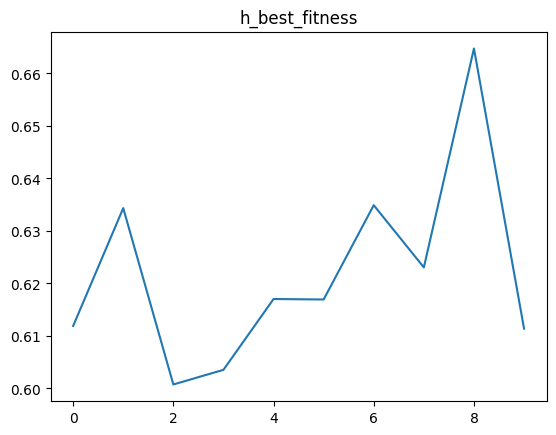

<ipython-input-117-9c1e7d8a860e>:52: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


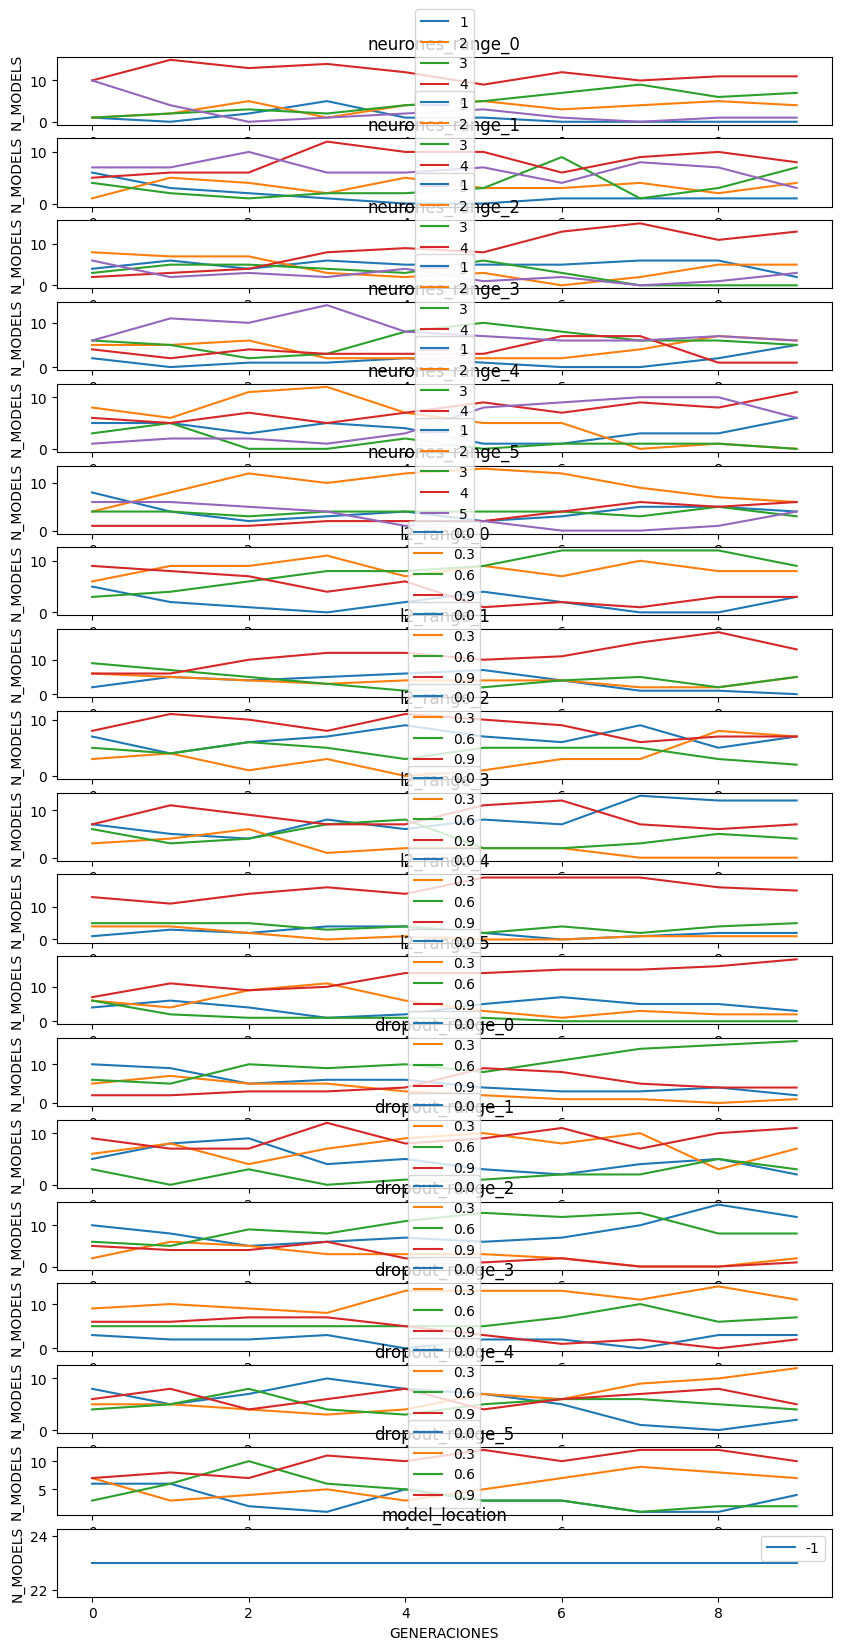

<ipython-input-117-9c1e7d8a860e>:52: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


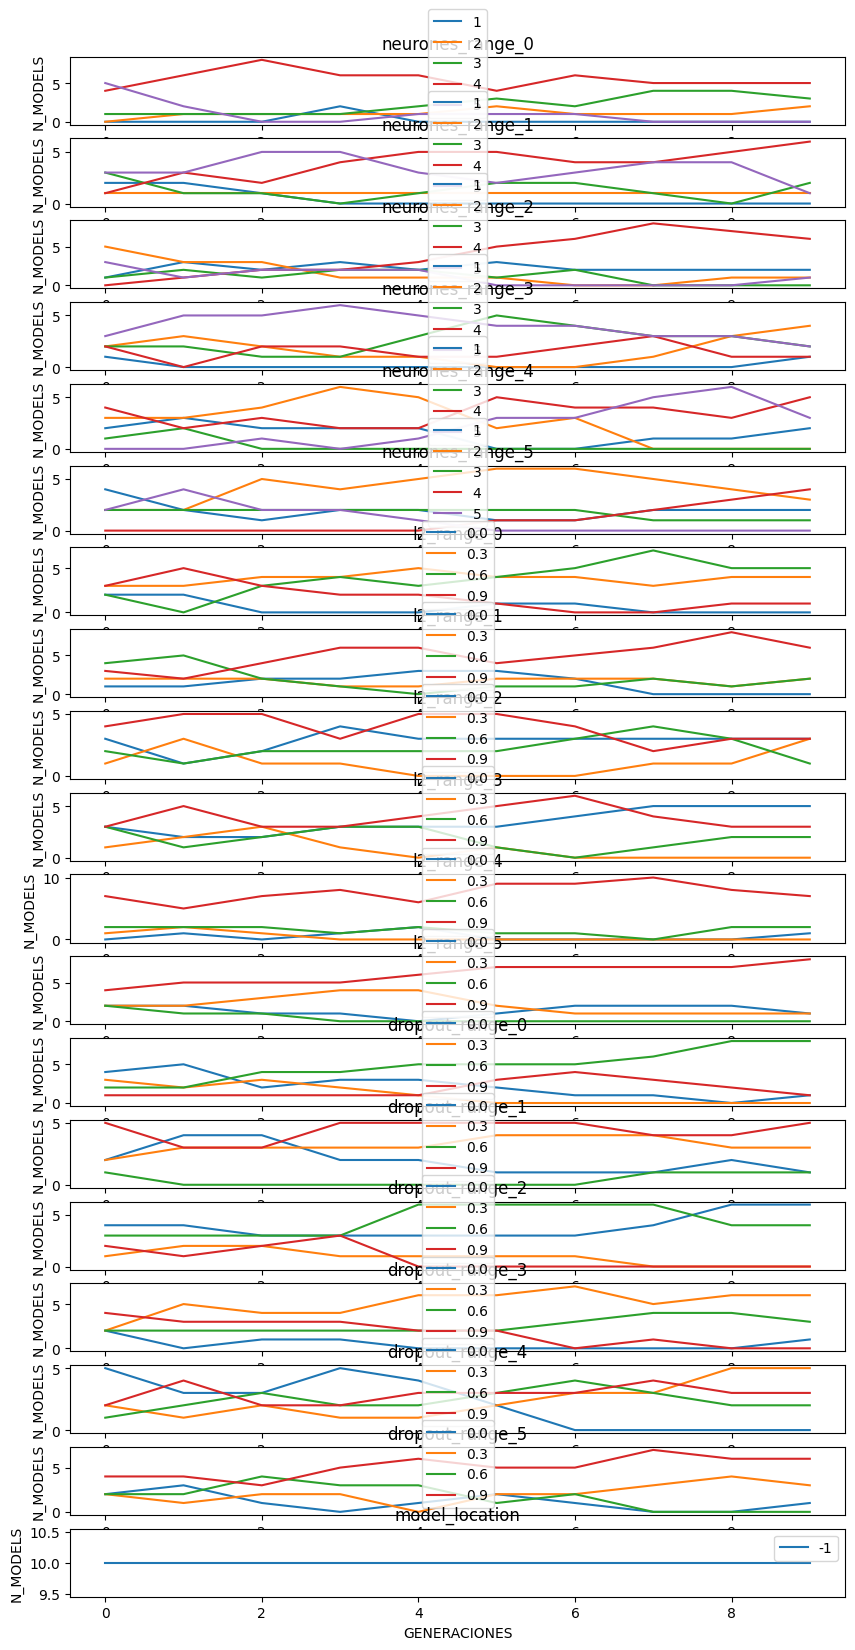

<ipython-input-117-9c1e7d8a860e>:52: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


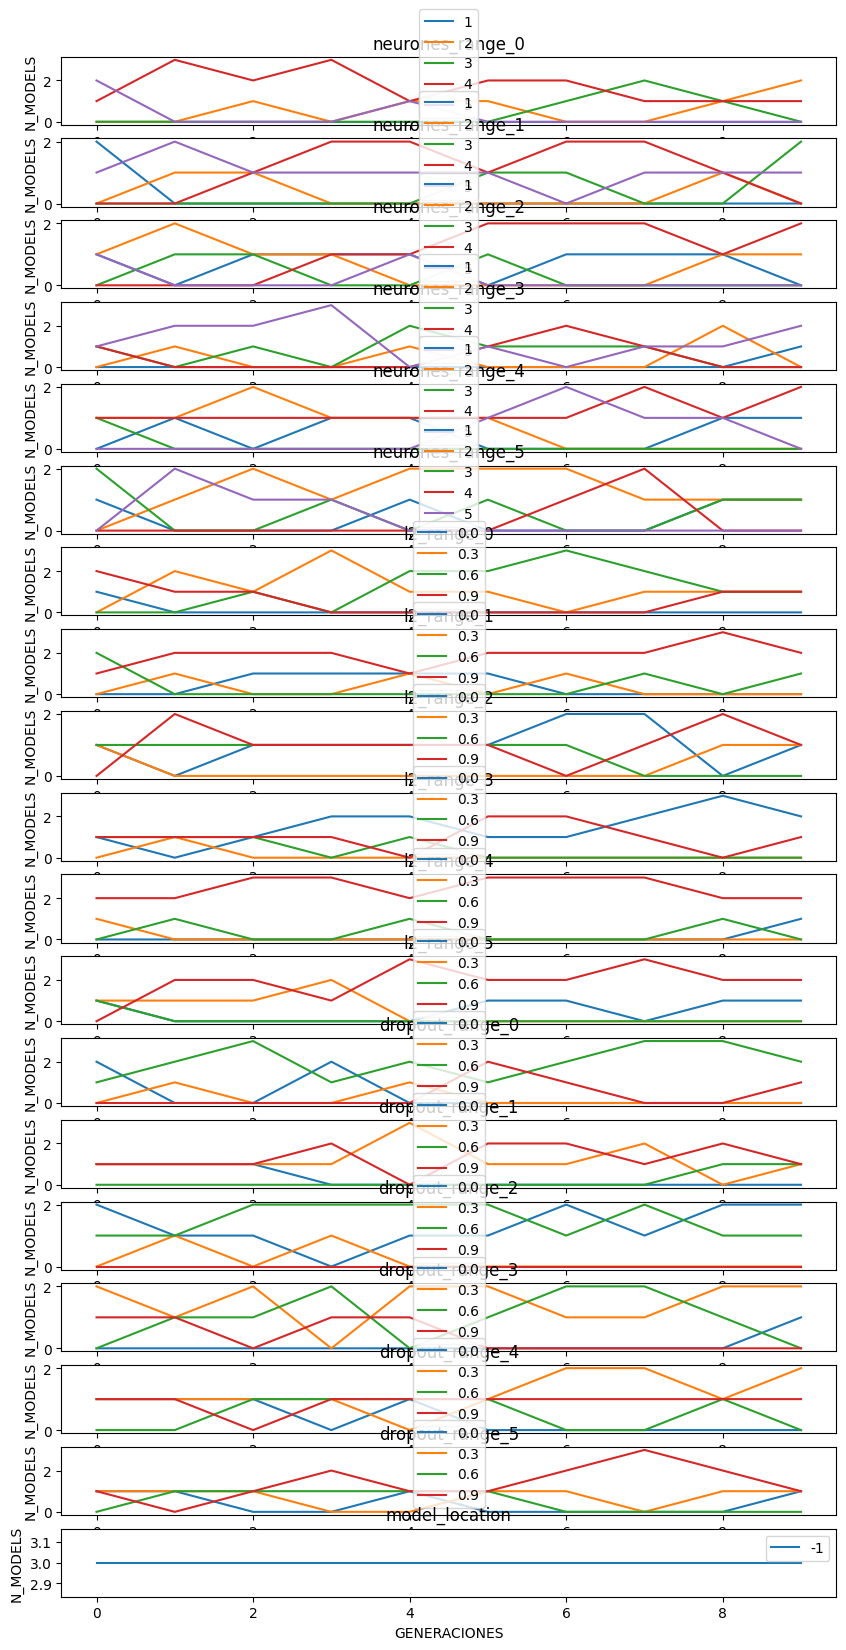

Proceso Evolucion_0 best_global_fitness :   0.664750412106514
Proceso Evolucion _ 1
-------------------------------
[[ 1.   0.   1.   1.   1.   0.   1.   0.   0.   0.   0.   0.   1.   0.
   0.   4.   4.   4.   4.   1.   2.   0.3  0.9  0.   0.6  0.9  0.9  0.6
   0.   0.6  0.6  0.3  0.9 -1. ]
 [ 1.   1.   1.   1.   0.   1.   0.   0.   0.   0.   0.   1.   1.   1.
   0.   2.   3.   2.   5.   1.   1.   0.6  0.9  0.3  0.9  0.   0.9  0.9
   0.3  0.   0.   0.9  0.3 -1. ]
 [ 1.   1.   1.   1.   1.   0.   1.   1.   0.   1.   0.   1.   1.   1.
   0.   4.   4.   4.   3.   5.   1.   0.6  0.9  0.3  0.   0.9  0.9  0.6
   0.3  0.3  0.   0.3  0.6 -1. ]
 [ 0.   1.   0.   1.   1.   1.   1.   0.   0.   0.   0.   1.   1.   1.
   1.   3.   2.   1.   2.   5.   2.   0.3  0.6  0.6  0.   0.9  0.9  0.6
   0.3  0.6  0.3  0.3  0.9 -1. ]
 [ 1.   1.   0.   1.   0.   1.   1.   0.   1.   1.   0.   1.   1.   1.
   1.   4.   4.   4.   3.   4.   1.   0.3  0.9  0.9  0.   0.6  0.9  0.6
   0.9  0.   0.3  0.6  0.9 -1. ]
 [ 1

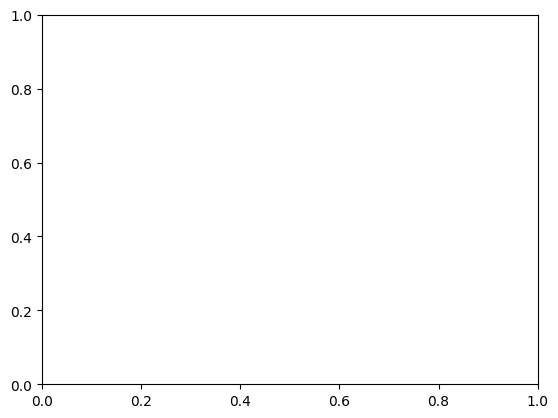

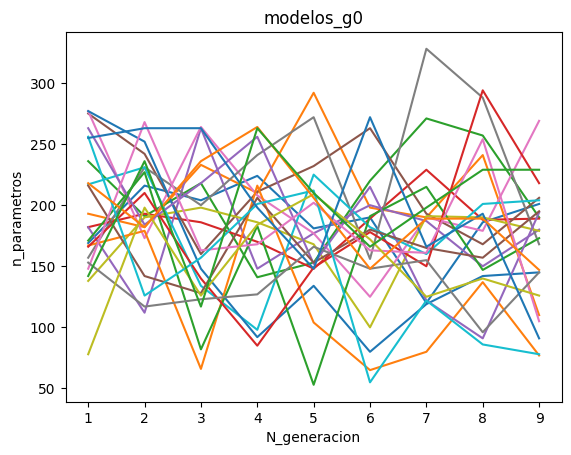

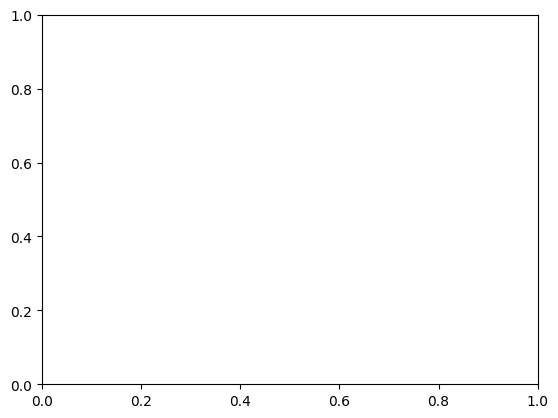

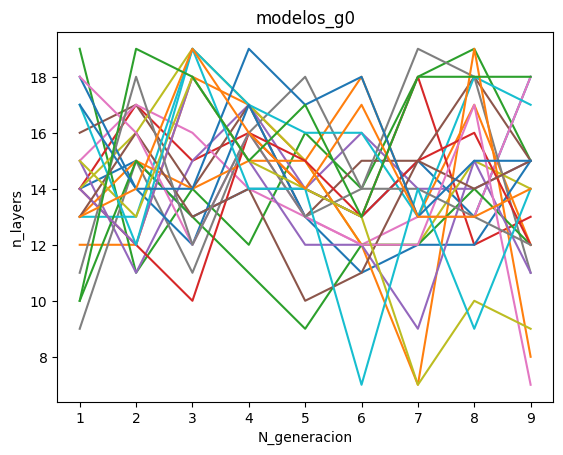

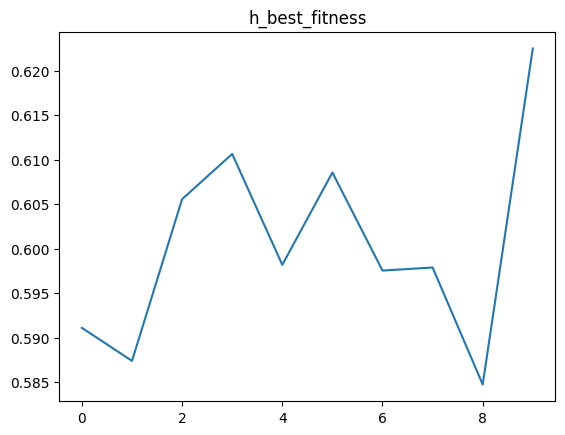

<ipython-input-117-9c1e7d8a860e>:52: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


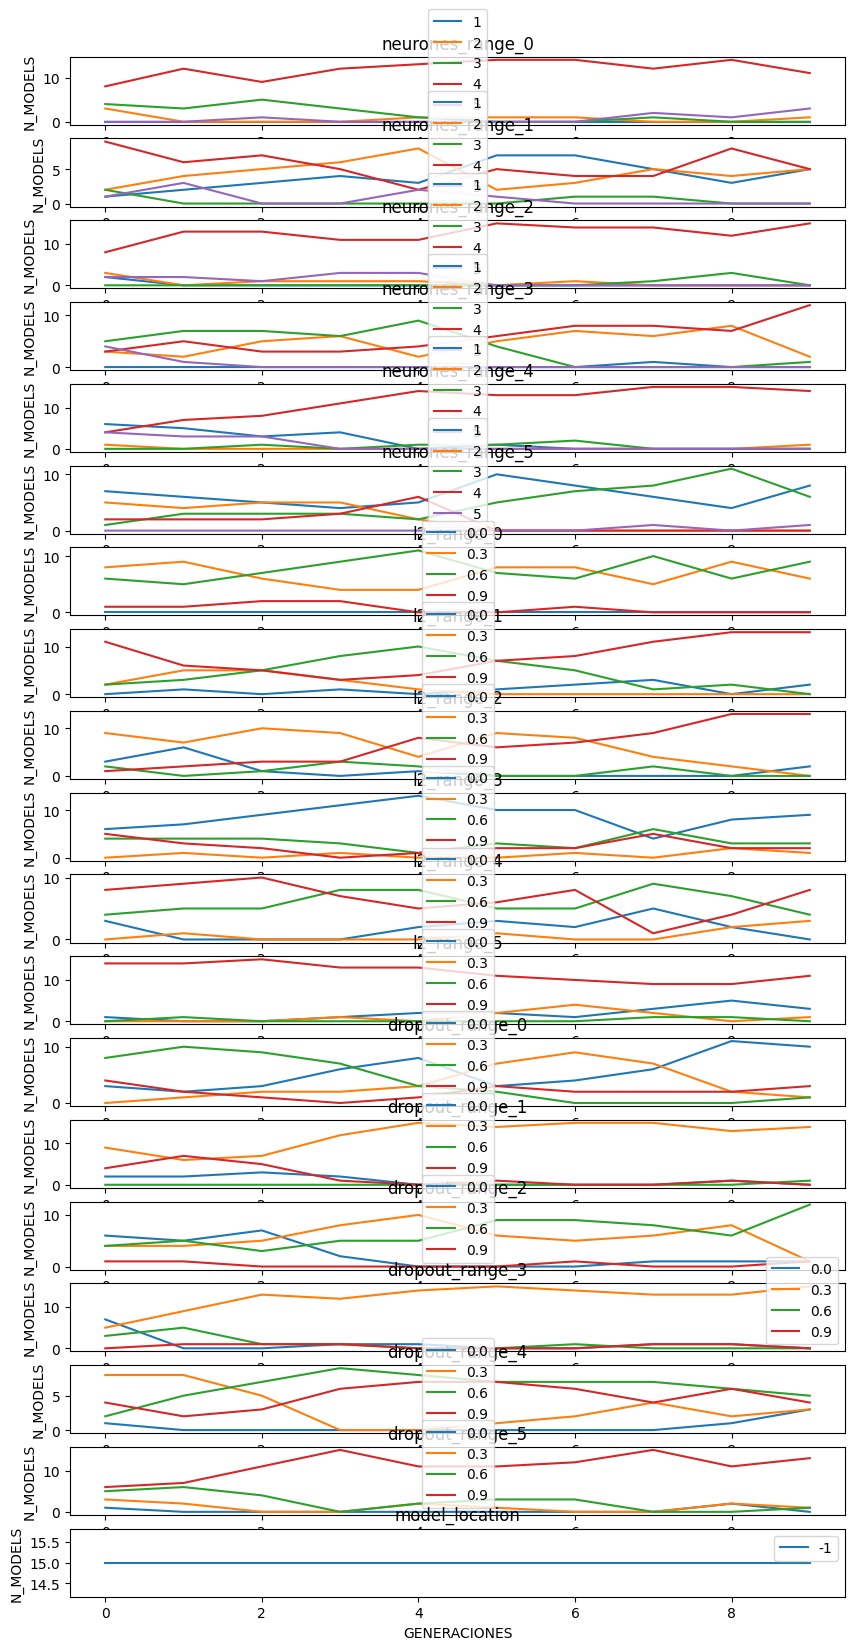

<ipython-input-117-9c1e7d8a860e>:52: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


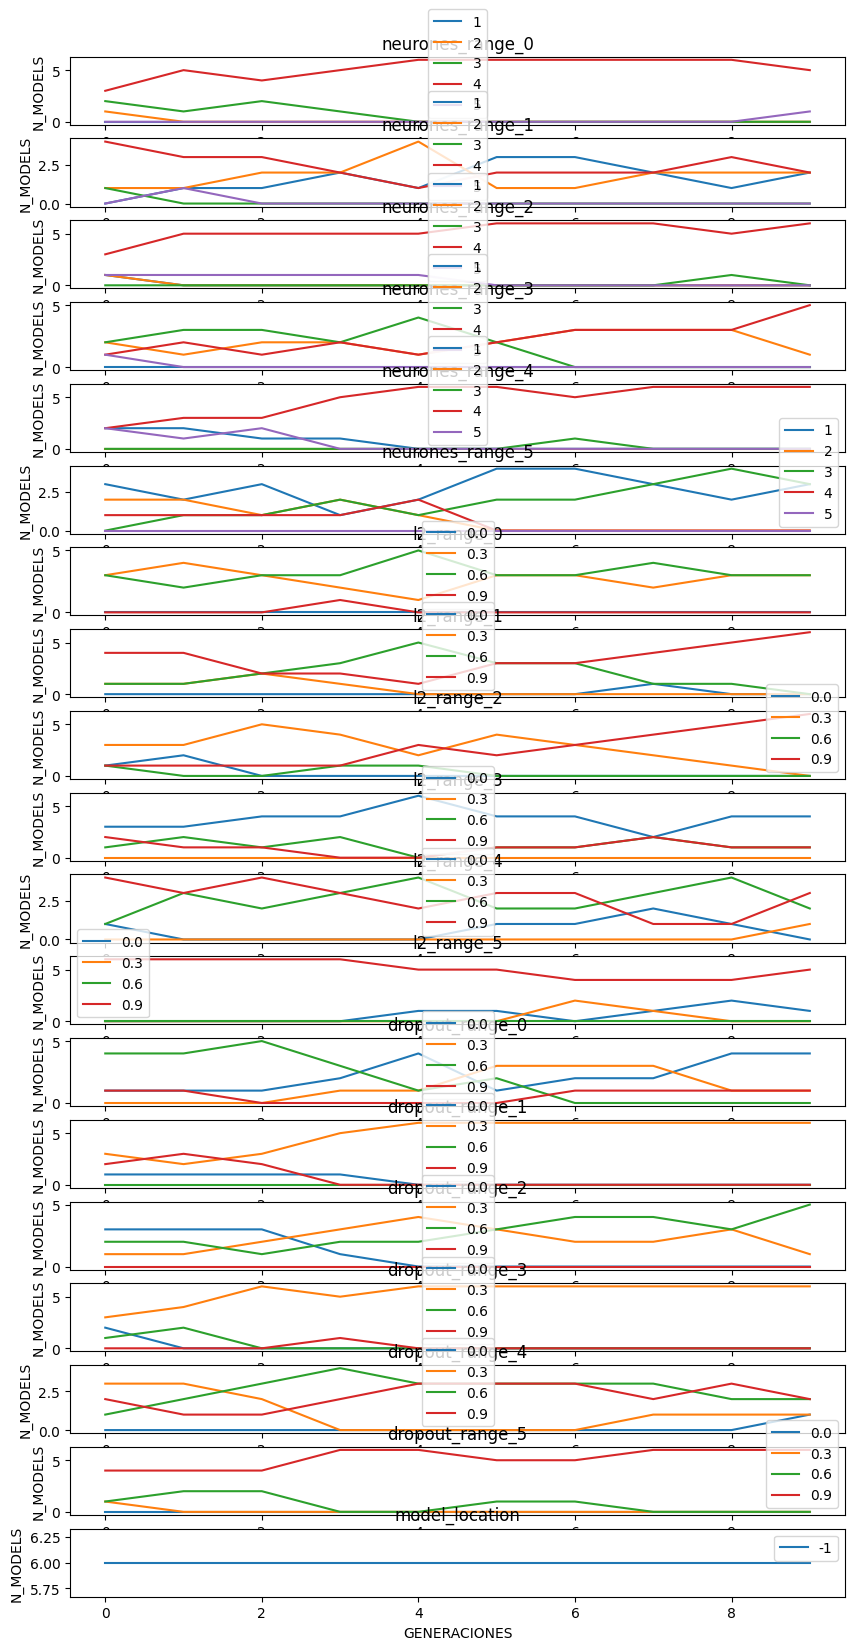

<ipython-input-117-9c1e7d8a860e>:52: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


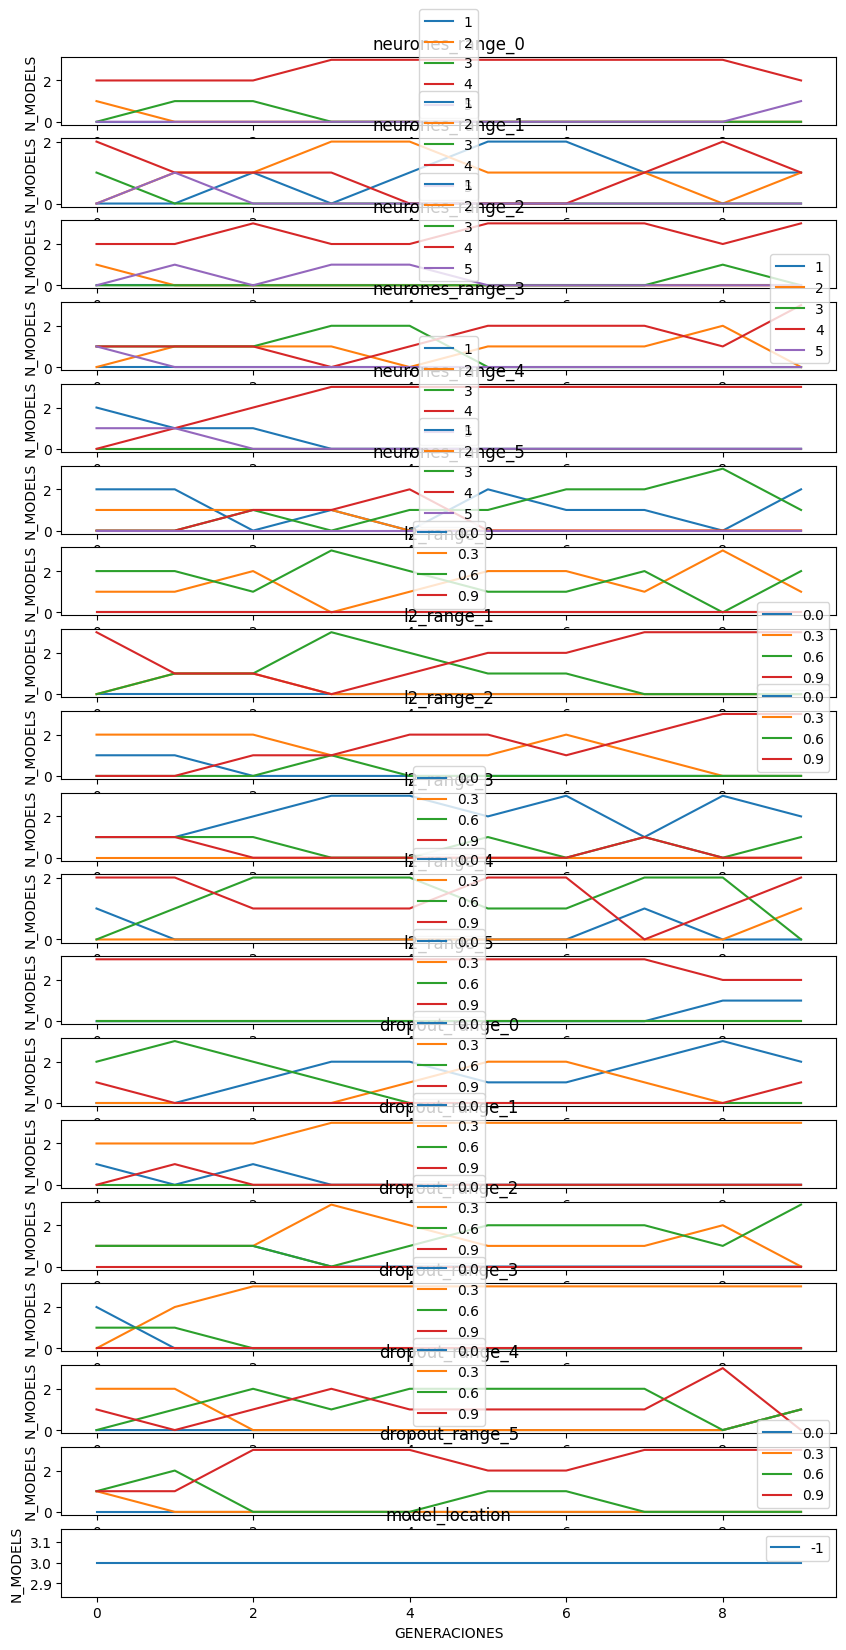

Proceso Evolucion_1 best_global_fitness :   0.6225220710039139
Proceso Evolucion _ 2
-------------------------------
[[ 1.   1.   1.   1.   1.   0.   1.   0.   1.   0.   0.   1.   1.   0.
   1.   4.   1.   4.   4.   4.   1.   0.3  0.9  0.9  0.   0.9  0.9  0.3
   0.3  0.6  0.3  0.9  0.9 -1. ]
 [ 1.   1.   1.   1.   1.   0.   1.   1.   0.   0.   0.   1.   1.   1.
   1.   4.   4.   4.   4.   4.   1.   0.6  0.9  0.9  0.   0.9  0.   0.9
   0.3  0.6  0.3  0.3  0.9 -1. ]]
BEST
0.28796179592609406
[ 1.   1.   1.   1.   1.   0.   1.   0.   1.   0.   0.   1.   1.   0.
  1.   4.   1.   4.   4.   4.   1.   0.3  0.9  0.9  0.   0.9  0.9  0.3
  0.3  0.6  0.3  0.9  0.9 -1. ]
GENERACION :  1
best_fitness :  0.28796179592609406
El código tomó 175.51 segundos para ejecutarse.
-------------------------------
[[ 1.   1.   1.   1.   1.   0.   1.   1.   0.   0.   0.   1.   1.   1.
   1.   4.   4.   4.   4.   4.   1.   0.6  0.9  0.9  0.   0.9  0.   0.9
   0.3  0.6  0.3  0.3  0.9 -1. ]
 [ 1.   1.   1.   1.   1

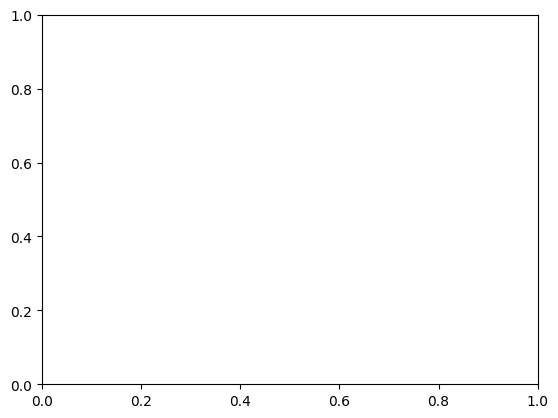

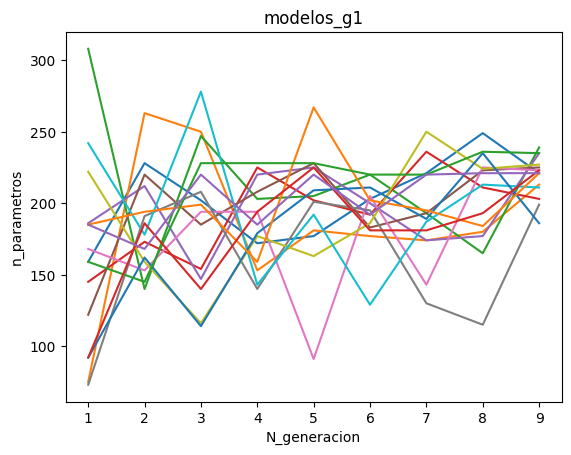

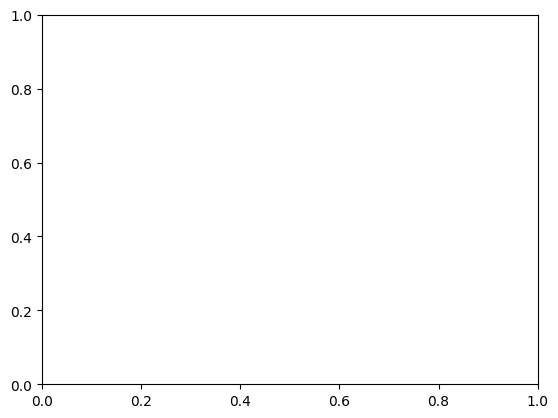

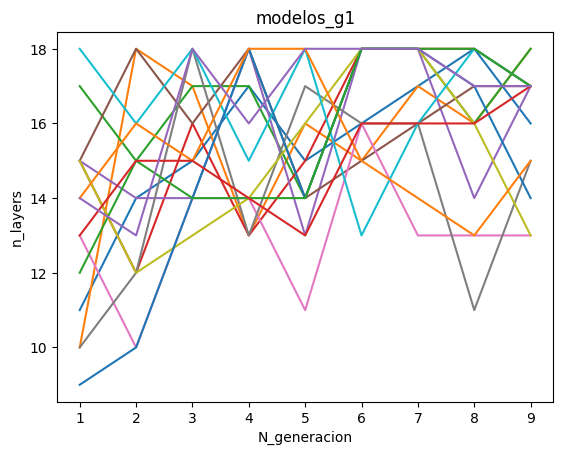

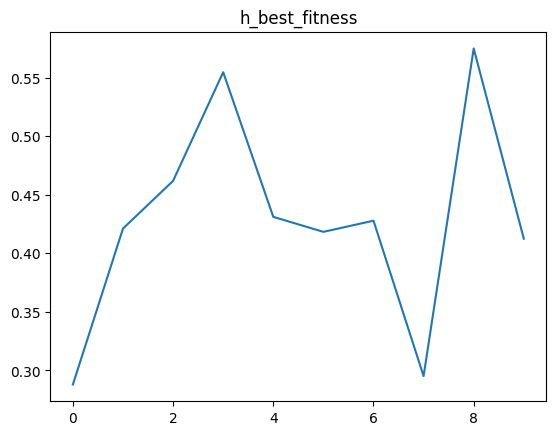

<ipython-input-117-9c1e7d8a860e>:52: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


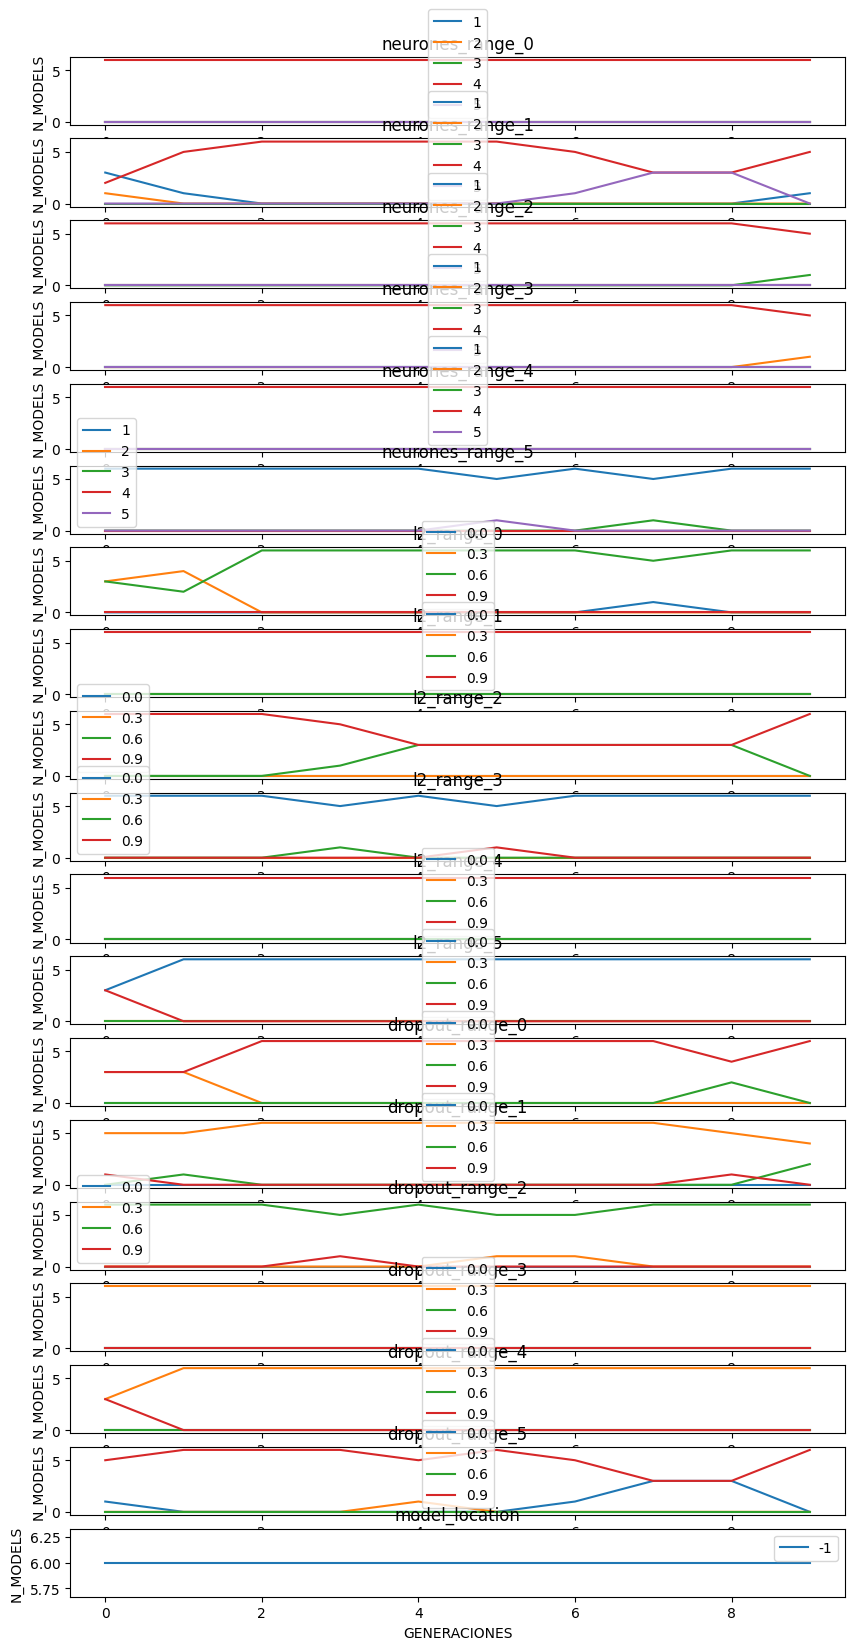

<ipython-input-117-9c1e7d8a860e>:52: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


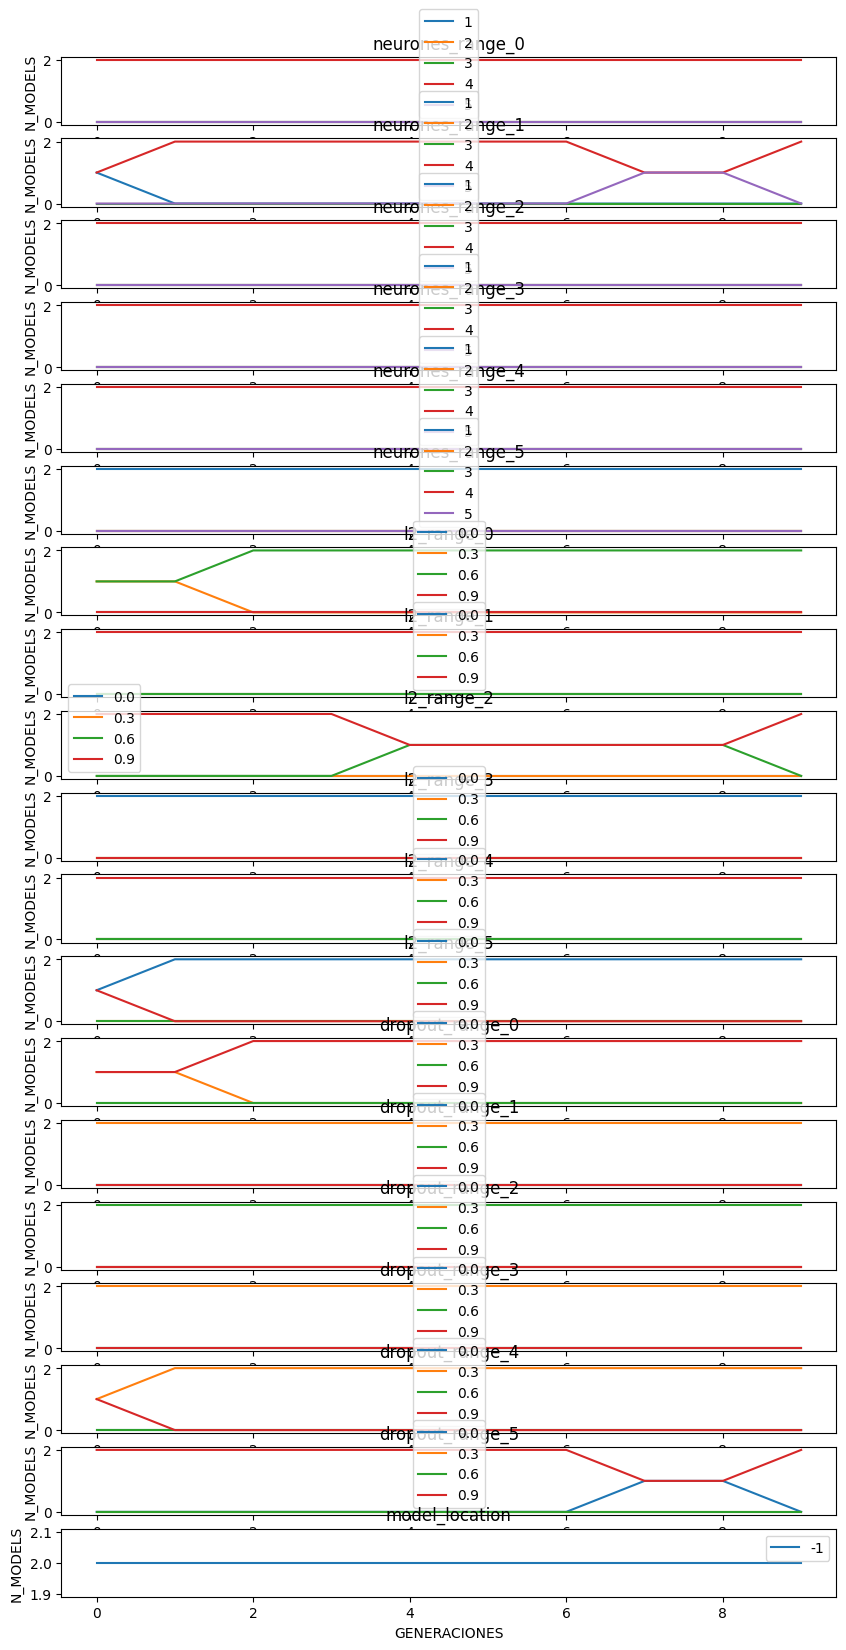

<ipython-input-117-9c1e7d8a860e>:52: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


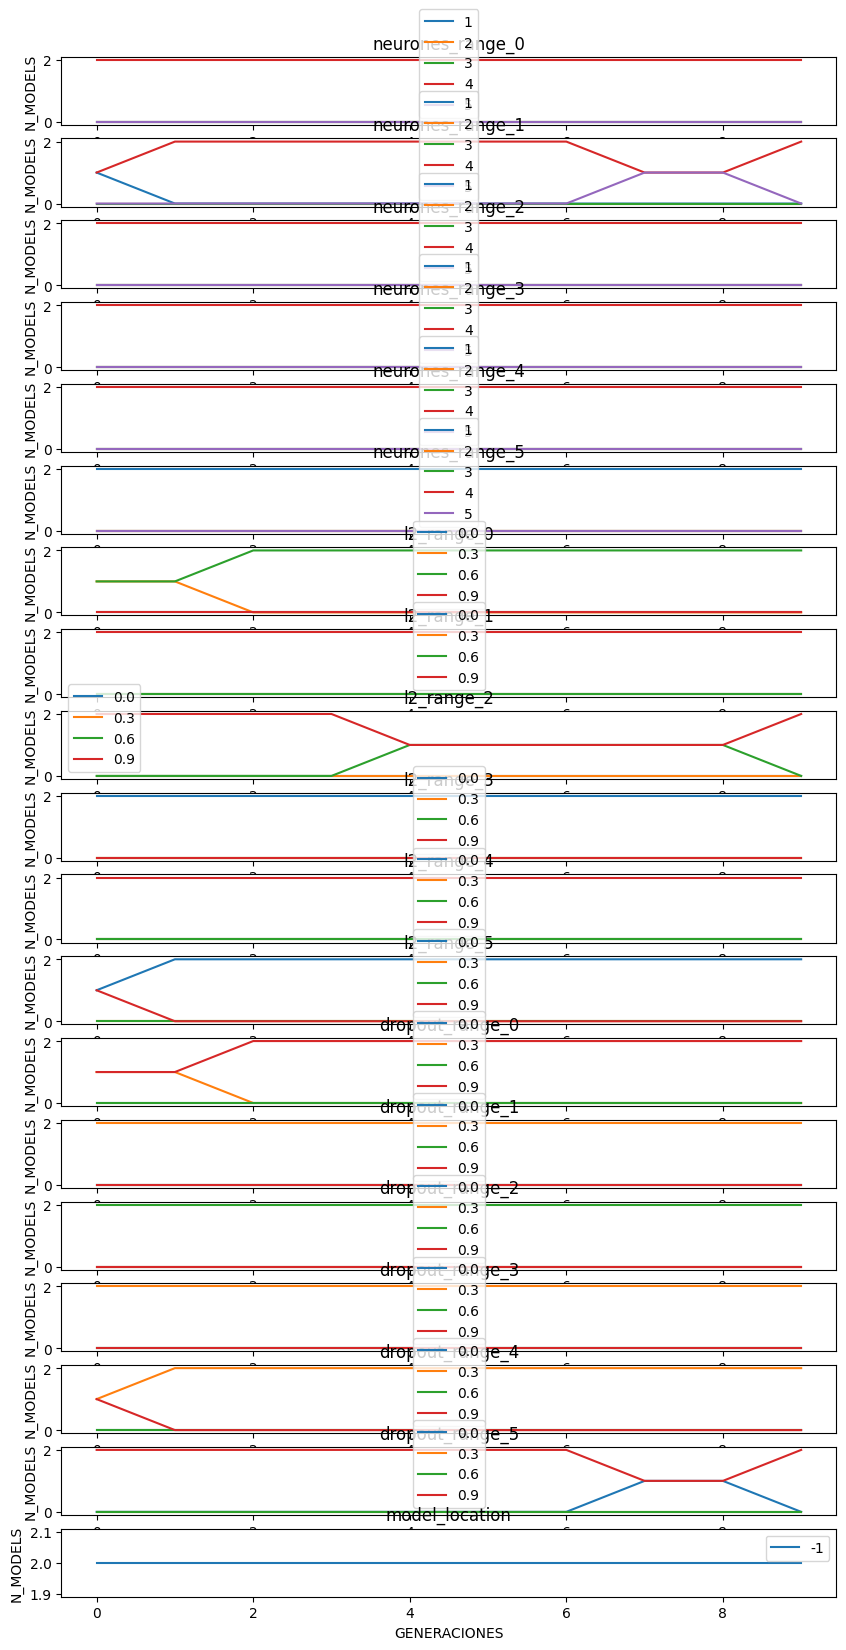

Proceso Evolucion_2  0.5748783648014069
Restoring model weights from the end of the best epoch: 2.
Epoch 52: early stopping


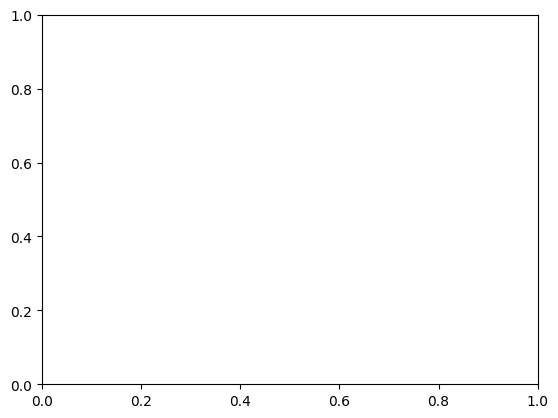

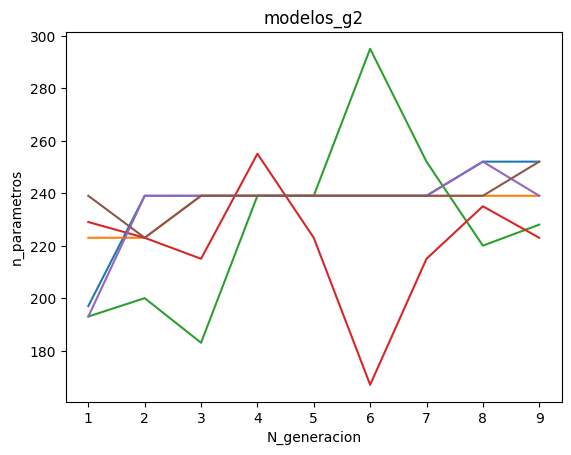

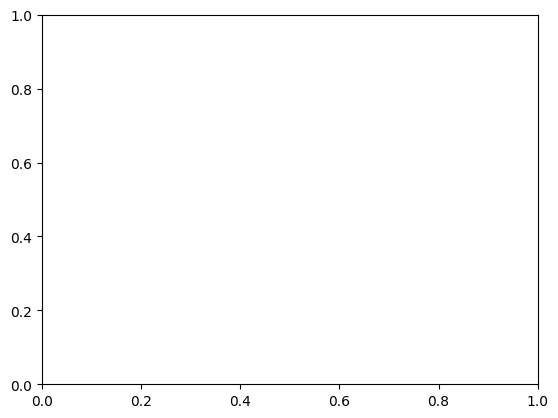

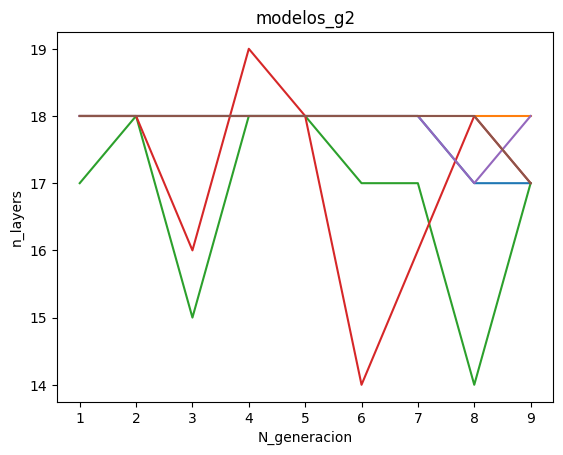

In [ ]:
model_fijo = proceso_evolucion(datos.X_train, datos.Y_train)

In [ ]:
model_fijo.save('best_model_1.h5')

In [ ]:
model_fijo.summary()

Model: "model_1958"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 INPUT (InputLayer)             [(None, 22)]         0           []                               
                                                                                                  
 Densa_0 (Dense)                (None, 4)            92          ['INPUT[0][0]']                  
                                                                                                  
 dropout_9065 (Dropout)         (None, 4)            0           ['Densa_0[0][0]']                
                                                                                                  
 Densa_1 (Dense)                (None, 4)            20          ['dropout_9065[0][0]']           
                                                                                         

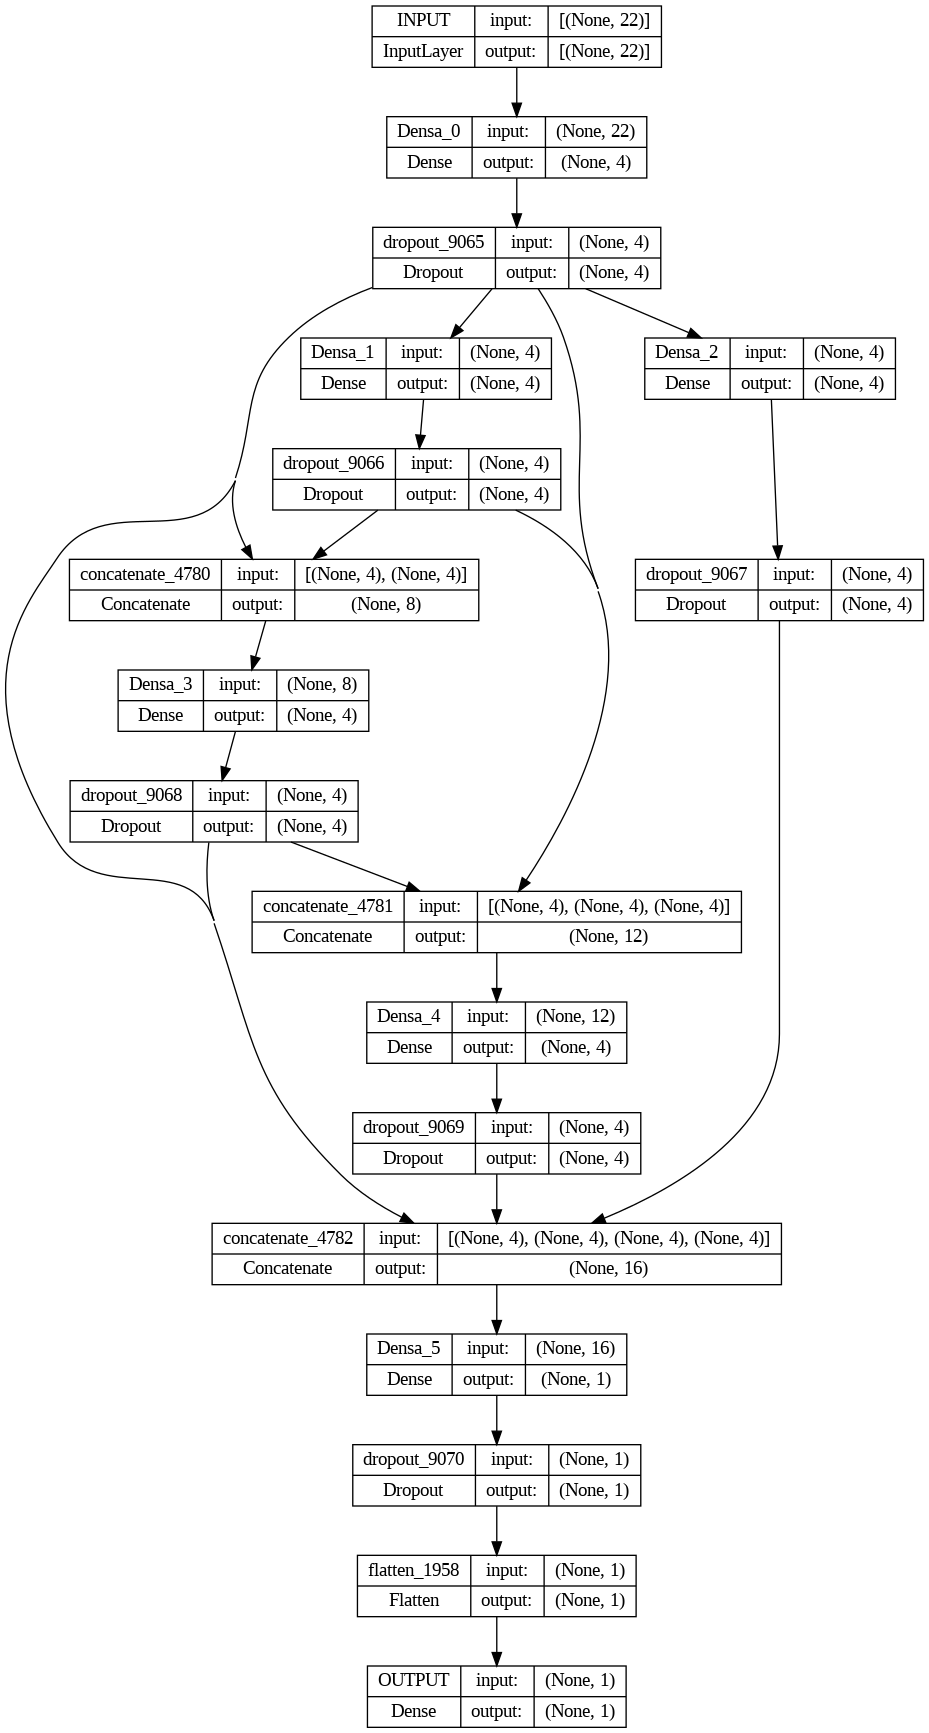

In [ ]:
plot_model(model_fijo, show_shapes=True, show_layer_names=True)

## Ejecutamos FIJO VS EVOLUTIVO

In [ ]:
data_vs = datos.df_test.copy()
data_vs.iloc[:, 2:-5] = datos.scaler.transform(data_vs.iloc[:, 2:-5])

mascara = mascara_1
# Dado que las mascaras son aleatorias crearemos una mascara para todo el dataset fija
mask_vs = mascara(data_vs.shape[0])
mask_vs = pd.DataFrame(mask_vs, index = data_vs.index)

# Modelos vs
model_fijo_datos_reales = load_model('best_model_1.h5')
model_fijo = load_model('best_model_1.h5')
model_evolutivo = load_model('best_model_1.h5')

# Entrenaremos cada x dias
contador_entrenamiento = 0
dias_para_entrenar = 400

# Contaremos el numero de vaces que el val_acurracy fue inferior a un nivel de referencia
contador_fallos_evolutivo = 0
nivel_de_referencia = 0.75
n_fallos_posibles = 15

h_accuracy_fijo_datos_reales = []
h_accuracy_fijo = []
h_acurracy_evolutivo = []
h_dia_entrenado = []
h_dia_evolucion = []
h_contador_fallos = []


fechas_para_iterar = sorted(set(data_vs.date))
for day in fechas_para_iterar:


  h_dia_entrenado.append(0)
  h_dia_evolucion.append(0)

  # datos dia
  datos_dia = data_vs[data_vs.date == str(day.date())]
  x, x_manipulados, y_true = get_datos(datos_dia, mask_vs)

  # ------ Preds & Acc ------

  # - Pred modelo fijo datos reales -

  h_accuracy_fijo_datos_reales.append(    get_accuracy(x, y_true, model_fijo_datos_reales)  )

  #  -Pred modelo fijo -

  h_accuracy_fijo.append(                   get_accuracy(x_manipulados, y_true, model_fijo)  )

  #  -Pred modelo evolutivo -

  h_acurracy_evolutivo.append(                get_accuracy(x_manipulados, y_true, model_evolutivo)  )

  # Contador fallos evolutivo

  contador_fallos_evolutivo += ( h_acurracy_evolutivo[-1] < nivel_de_referencia ) * 1
  h_contador_fallos.append(contador_fallos_evolutivo)


  # ------ ENTRENAMIENTO ------

  contador_entrenamiento += 1
  if contador_entrenamiento >= dias_para_entrenar :
    contador_entrenamiento = 0
    h_dia_entrenado[-1] = 1

    # datos entrenamiento
    datos_dia = data_vs[data_vs.date < str(day.date())]
    print("Fechas Train:" , str(list(sorted(set(datos_dia.date)))[-1].date()) + " - " + str(list(sorted(set(datos_dia.date)))[0].date())  )

    print("Fallos:", contador_fallos_evolutivo )
    x, x_manipulados, y_true = get_datos(datos_dia, mask_vs)
    print("shape entrenamiento: " , x.shape)
    # Entrenamos modelo fijo datos reales
    print("Entrenamos Fijo datos reales")
    entrenar_modelo(x, y_true, model_fijo_datos_reales )

    # Entrenamos modelo fijo
    print("Entrenamos Fijo")
    entrenar_modelo(x_manipulados, y_true, model_fijo )

    # ¿ Evolucinamos ?
    if contador_fallos_evolutivo > n_fallos_posibles:

      print("EVOLUCION")
      contador_fallos_evolutivo = 0
      h_dia_evolucion[-1] = 1
      model_evolutivo = proceso_evolucion(x_manipulados, y_true, model_location = True)

    else:
      # Entrenamos modelo evolutivo
      print("Entrenamos Evolutivo")
      entrenar_modelo(x_manipulados, y_true, model_evolutivo )

print("FIN")


In [ ]:
model_evolutivo.save('best_model_vs_1.h5')

In [ ]:
model_evolutivo.summary()
plot_model(model_evolutivo, show_shapes=True, show_layer_names=True)

In [ ]:
fig, ax = plt.subplots(figsize=(30,5))
plt.plot(model_fijo(datos.X_test), marker='o', linestyle='none')

In [ ]:
fig, ax = plt.subplots(figsize=(30,5))
plt.plot(model_evolutivo(datos.X_test), marker='o', linestyle='none')

### ver_performance (def)

In [ ]:
def ver_performance(h_acurracy_evolutivo ):
  # Tu array de valores
  data = np.array(h_acurracy_evolutivo)
  # Calcula la suma acumulativa
  cumulative_sum = np.cumsum(data)
  # Calcula la media acumulativa
  cumulative_average = cumulative_sum / (np.arange(len(data)) + 1)


  fig, ax = plt.subplots(figsize=(30,5))

  plt.plot( h_acurracy_evolutivo,  color='red',  label='h_acurracyo', marker='o', linestyle='none')

  plt.plot( cumulative_average ,  color='red')


  # Trazar líneas verticales azules donde h_dia_entrenado sea 1
  for i, value in enumerate(h_dia_entrenado):
      if value == 1:
          ax.axvline(x=i, color='blue', linestyle='--', alpha=0.7)
  # Trazar líneas verticales azules donde h_dia_evolucion sea 1
  for i, value in enumerate(h_dia_evolucion):
      if value == 1:
          ax.axvline(x=i, color='red', linestyle='--', alpha=0.7)


  ax.set_xlabel("dia")
  ax.set_ylabel("Binary cross entropy")

  plt.show()

### Ver resultados

In [ ]:
 # Tu array de valores
data = np.array(h_accuracy_fijo)
# Calcula la suma acumulativa
cumulative_sum = np.cumsum(data)
# Calcula la media acumulativa
cumulative_average = cumulative_sum / (np.arange(len(data)) + 1)


fig, ax = plt.subplots(figsize=(30,5))

plt.plot( cumulative_average,  color='red')

 # Tu array de valores
data = np.array(h_acurracy_evolutivo)
# Calcula la suma acumulativa
cumulative_sum = np.cumsum(data)
# Calcula la media acumulativa
cumulative_average = cumulative_sum / (np.arange(len(data)) + 1)


plt.plot( cumulative_average,  color='blue')


In [ ]:
ver_performance(h_accuracy_fijo)
ver_performance(h_acurracy_evolutivo )
ver_performance(h_accuracy_fijo_datos_reales )

In [ ]:
# Tu array de valores
data = np.array(h_accuracy_fijo)
# Calcula la suma acumulativa
cumulative_sum = np.cumsum(data)
# Calcula la media acumulativa
cumulative_average = cumulative_sum / (np.arange(len(data)) + 1)

fig, ax = plt.subplots(figsize=(30,5))

plt.plot( h_accuracy_fijo,  color='red',  label='h_acurracyo', marker='o', linestyle='none')

plt.plot( cumulative_average ,  color='red')


# Tu array de valores
data = np.array(h_acurracy_evolutivo)
# Calcula la suma acumulativa
cumulative_sum = np.cumsum(data)
# Calcula la media acumulativa
cumulative_average = cumulative_sum / (np.arange(len(data)) + 1)



plt.plot( h_acurracy_evolutivo,  color='blue',  label='h_acurracyo', marker='o', linestyle='none')

plt.plot( cumulative_average ,  color='blue')




# Trazar líneas verticales azules donde h_dia_entrenado sea 1
for i, value in enumerate(h_dia_entrenado):
    if value == 1:
        ax.axvline(x=i, color='blue', linestyle='--', alpha=0.7)
# Trazar líneas verticales azules donde h_dia_evolucion sea 1
for i, value in enumerate(h_dia_evolucion):
    if value == 1:
        ax.axvline(x=i, color='red', linestyle='--', alpha=0.7)


ax.set_xlabel("dia")
ax.set_ylabel("Binary cross entropy")

plt.show()